In [1]:
import numpy as np
import pandas as pd
import pickle
import time
import itertools

import matplotlib
matplotlib.rcParams.update({'font.size': 17.5})

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os.path
sys.path.append( os.path.abspath(os.path.join( os.path.dirname('..') , os.path.pardir )) )

In [2]:
from FLAMEdb import *
from FLAMEbit import *
from data_generation import *

In [6]:
# data generation, set exponential to be True or False for exponential decay and power-law decay respectively

d = data_generation_gradual_decrease( 15000 , 15000 , 20, exponential=False )
df = d[0] 
holdout,_ = data_generation_gradual_decrease( 15000 , 15000,  20, exponential=False )
res = run_bit(df, holdout, range(20), [2]*20, tradeoff_param = 0.1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 2]
[0, 1]
no more matches


In [7]:
def bubble_plot(res):
    sizes = []
    effects = []
    
    for i in range(min(len(res),21)):
        r = res[i]
        if (r is None):
            effects.append([0])
            sizes.append([0])
            continue
        effects.append(list( r['effect'] ) )
        sizes.append(list(r['size'] ) )
    return sizes, effects

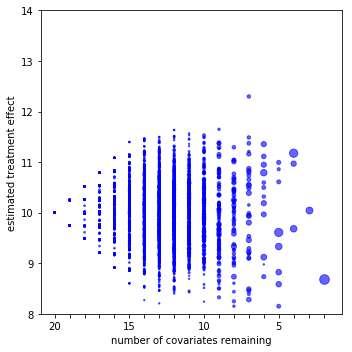

In [8]:
# plot the CATE on each level, figure 3

ss, es = bubble_plot(res[1])

plt.figure(figsize=(5,5))   

for i in range(len(ss)):
    plt.scatter([i]*len(es[i]), es[i], s = ss[i], alpha = 0.6 , color = 'blue')

plt.xticks(range(len(ss)), [str(20-i) if i%5==0 else '' for i in range(20) ] )    

plt.ylabel('estimated treatment effect')
plt.xlabel('number of covariates remaining')

#plt.ylim([8,14])

plt.tight_layout()

#plt.savefig('tradeoff01.png', dpi = 300)